# Lecture 4: Numpy, branching and iterations, formats
- *NumPy* library - powerful library on *NUM*erical *PY*thon
- Array and matrix operation with NumPy
- Branching and iterations
- File formats, data formats, types of variables

## Quick start reminder:
* Open terminal (Mac, Lin) / Anaconda Power Shell (Win)
```
% conda activate bb1000
% cd MyWorkingDir
% mkdir Lecture_4
```
- Download from Module 4 on Canvas `.jpynb` files (Lecture 4 notes and homework) and save them to your Lecture 4 working directory, e.g. `MyWorkingDirectory/Lecture4/`
```
% jupyter-lab
```
- Change your working directory to 'Lecture_4'
- Open your working python notebook and rename it; open Lecture4_notes.ipynb for your reference

## NumPy intorduction

Python uses 'lists', which is slow, not very flexible and usually not enough for more advanced coding. Numerical Python (NumPy) library is the most used library for scientific computing. NumPy provides high-performance multidimensional array object and many tools for working with them. 

* Let us compare performance of Python versus NumPy:

In [3]:
# Create a python list 'a' and an empty list 'b'
a = list(range(1000000))
b = [0] * 1000000
print(len(a), len(b))
a[20]

1000000 1000000


20

In [4]:
%%timeit

# Let us compute b = a*a
for i in range(len(a)):
    b[i] = a[i] ** 2

65.7 ms ± 620 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


* Now let us do the same with NumPy
* The very first thing is to activate Numpy, e.g. import the library:

In [5]:
import numpy as np

# you can use any name you like instead of "np"

In [6]:
a = np.arange(1000000)
b = np.zeros(1000000)

In [7]:
%%timeit
b = a**2

834 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


* NumPy aims to provide an array object that is up to 50x faster than traditional Python lists.
* **Why is NumPy faster than lists?** 
* NumPy arrays are stored at one continuous place in memory unlike lists, so processes can access and manipulate them very efficiently.
* It is known as **"locality of reference"** in computer science.
* Moreover, NumPy is optimized to work with latest CPU architectures.
* Avoid looping by using vector math. 
* Operations with array properties.

## Numpy math functions
* `np.cos`, `np.log`, `np.exp`, etc.
* The whole list can be found via [this link](https://numpy.org/doc/stable/reference/routines.math.html)

In [8]:
print(np.cos(np.pi / 3))
print(np.round(np.pi, 5))

0.5000000000000001
3.14159


## NumPy arrays

* You can find out most detailes on Numpy arrays at [W3School pages](https://www.w3schools.com/python/numpy/numpy_creating_arrays.asp).
* You always start with importing Numpy at the beginning of Notebook. As we already did so above, no need to put in every new cell


In [9]:
# Creating NumPy arrays:

a1d = np.array([1, 2, 3])  # 1-dimensional array (rank 1) or vector
a2d = np.array([[1, 2, 3], [4, 5, 6]])  # 2-dimensional array (rank 2) or matrix
a3d = np.array(
    [[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]]
)  # 3-dimensional array (rank 3) or tensor

In [12]:
# slicing and indexing
print(a2d)
print(a2d[0])
print(a2d[-1, 0])

# x[-1] -- is the last element of an array
print(a2d[:,-1])

[[1 2 3]
 [4 5 6]]
[1 2 3]
4
[3 6]


In [13]:
# Check size and dimensions

print(a3d.shape)

print(a3d.size)  # equals 2*2*3

print(a3d.ndim)  # number of dimensions

np.info(a3d)

(2, 2, 3)
12
3
class:  ndarray
shape:  (2, 2, 3)
strides:  (48, 24, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x5607080c8860
byteorder:  little
byteswap:  False
type: int64


## Specific array types, array reshape

In [10]:
n = 3
m = 4

zero = np.zeros((n, m))  # nxm array with all elements 0
ones = np.ones((m, n))  # mxn array with all elements 1
thrs = np.full((n, n), 3)  # nxn array with all elements 3
unit = np.eye(m)  # mxm identity matrix

rang = np.arange(n)  # Evenly spaced values in an interval
lins = np.linspace(0, 10, 101)  # same as above, see exercise

bool = np.ones((3, 2), "bool")  # nxm boolean array

In [11]:
ones

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [12]:
a = np.arange(12)
b = a.reshape(2, 2, 3)
b.ndim

3

## Data types in Numpy, change data type
* *strings*  - used to represent text data, the text is given under quote marks. e.g. "ABCD"
* *integer* - used to represent integer numbers. e.g. -1, -2, -3
* *float* - used to represent real numbers. e.g. 1.2, 42.42
* *boolean* - used to represent True or False.
* *complex* - used to represent complex numbers. e.g. 1.0 + 2.0j, 1.5 + 2.5j

In [13]:
print(bool.dtype)
print(bool)
bool.astype("int")

bool
[[ True  True]
 [ True  True]
 [ True  True]]


array([[1, 1],
       [1, 1],
       [1, 1]])

In [14]:
a = np.array([0.1, 2.3, 3.9, 4.5, 6.6])
print(np.info(a))
a.astype("int")
# Rounds it to smallest integer

class:  ndarray
shape:  (5,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x55c2ada73e60
byteorder:  little
byteswap:  False
type: float64
None


array([0, 2, 3, 4, 6])

***
## Exercise 0

1) Create two 1D arrays of length 5 using `np.arange(5)` and `np.linspace(0,4,5)`. Are they equivalent or different? Use `.dtype` to compare. How one can adjust one to another?
2) Create a 2D 5x4 array of random float numbers between 0 and 1 using `np.random.random((5,4))`. If you now change datatype to 'int' how does it look? Why?
3) Reshape array from above to 2x10 array using `yourarrayname.reshape((10,2))` command. In how many ways you can reshape 5x4 matrix?
4) Create a new 4x4 arrays by removing the 1st row of the 5x4 array you created in (2)
***

## Matrix operations in Numpy
* Basic arithmetic *(+, -, *, /)* in NumPy is element-by-element operations avoiding loops -- vectorization of math!
* For matrix multiplication Numpy uses the *@* symbol
* Common mathematical operations: numpy.subtract, numpy.multiply, numpy.divide, .T  or numpy.transpose(), numpy.sqrt, numpy.sum(), numpy.mean(), and others...

In [14]:
n = np.arange(12)
a = n.reshape((3, 4))
b = np.full((3, 4), 2)

In [15]:
a + b

array([[ 2,  3,  4,  5],
       [ 6,  7,  8,  9],
       [10, 11, 12, 13]])

In [16]:
c = np.add(a, b)
c

array([[ 2,  3,  4,  5],
       [ 6,  7,  8,  9],
       [10, 11, 12, 13]])

In [17]:
a * b
# element-by-element multiplication, same as
np.multiply(a, b)

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [18]:
# ... contrary to matrix multiplication
a @ b.T
c = np.dot(a, b.T)
c

array([[12, 12, 12],
       [44, 44, 44],
       [76, 76, 76]])

In [19]:
print(np.sum(c, axis=1))
print(np.sum(c))

[ 36 132 228]
396


## Numpy I/O: Save arrays and load arrays

In [20]:
np.save("out.npy", c)
x = np.load("out.npy")

In [21]:
x.dtype

dtype('int64')

In [22]:
# compare to saving as text)
np.savetxt("out.txt", c)
y = np.loadtxt("out.txt")
print(c)
print(y)

[[12 12 12]
 [44 44 44]
 [76 76 76]]
[[12. 12. 12.]
 [44. 44. 44.]
 [76. 76. 76.]]


## View vs copy
* When making a copy, and change the original array, new array does not change
* When make a view, change of original array changes new array as well
* Be careful, as `a = b` is equivalent to `a = b.view()`, but does not create new array!

In [29]:
# Copy
a = np.array([1, 2, 3, 4, 5])
x = a.copy()
a[0] = 42
print(a, x)

[42  2  3  4  5] [1 2 3 4 5]


In [30]:
# View
a = np.array([1, 2, 3, 4, 5])
x = a
# Equivalent to x = a.view()
a[0] = 42
print(a, x)

[42  2  3  4  5] [42  2  3  4  5]


* This counter-intuitive behavior is important for saving the memory and optimization of calculations when two variables can read from the same physical memory:
  
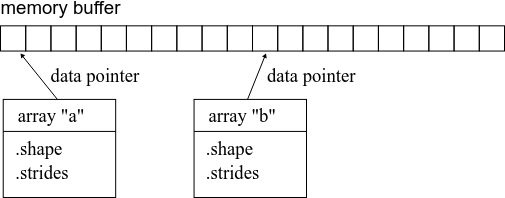

***
## Exercise 1
1) What is the difference between `np.sum(axis=1)` vs `np.sum(axis=0)` on a two-dimensional array? What if you leave out the axis parameter?
2) What is the difference between `np.multiply()` and `np.dot()`? Create two 2D arrays and test how those two function work.
3) Save a 2D array as `txt` and `npy`, check how data looks in the output files using text-editor. What is difference in file size?
4) Load data you just saved to new variables. Is the data-type preserved?
5) Run the following code:
```
a = np.eye(4)
b = a[:,0]
b[0] = 5
```
Print out `a` before `b` has changed and after. Is it the same? How this can be avoided?
***

## Branching and iterations
1) Branching:
    * `if - elif - else`
2) Conditions:
    * Equal: `a == b`
    * Not equal: `a != b`
    * Less, less or equal: `a < b`, `a <= b`
3) Iterations:
    * Loop `for`
    * Loop `while`

In [33]:
a = 1
while a < 10:
    if a < 5:
        print('"a" is smaller than 5')
    elif a > 5:
        print('"a" is larger than 5!')
    else:
        print('"a" is 5!')
    a += 2

"a" is smaller than 5
"a" is smaller than 5
"a" is 5!
"a" is larger than 5!
"a" is larger than 5!


~~~
age = int(input("Enter your age: "))

if age >= 0 and age <= 12:
    print("Your age group is Child")
elif age >= 13 and age <= 19:
    print("Your age group is Teenager")
elif age >= 20 and age <= 59:
    print("Your age group is Adult")
else:
    print("Your age group is Senior Citizen")
~~~

***
## Exercise 2
* Compute $\pi$ using Leibniz formula
$$
\pi/4 = 1 - 1/3 + 1/5 - 1/7 + 1/9 - ... = \sum_{i=0}^{\infty} \frac{(-1)^i}{2i+1}
$$
with the help of 
1) iteration procedure (no Numpy)
2) array summation with Numpy
* `%%timeit` both version for `i` in range `[0...1000000]`
* Find accuracy of your calculation comparing it with `np.pi` and changing number of term in your sum
* Use `while` loop to compute $\pi$ until certain accuracy (e.g. 1e-4): 
***

## Summary 

### Data type vs. data structure vs. file format
* Data type: Type of a single piece of data (integer, string, float, …).
* Data structure: How the data is organized in memory (individual columns, 2D-array, nested dictionaries, …).
* File format: How the data is organized when it is saved to the disk (columns of strings, block of binary data, …).


**For example**, a black and white image stored as a .png-file (file format) might be stored in memory as an NxM array (data structure) of integers (data type).

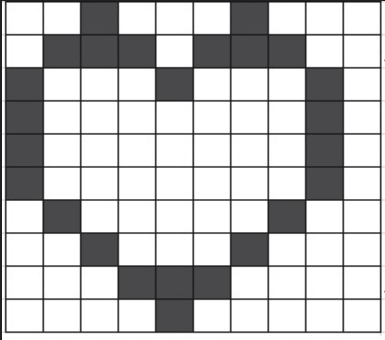

In [28]:
heart = np.array([[1,1,0,1,1,1,0,1,1,1],[1,0,0,0,1,0,0,0,1,1],[0,1,1,1,0,1,1,1,0,1],[0,1,1,1,1,1,1,1,0,1],[0,1,1,1,1,1,1,1,0,1],[0,1,1,1,1,1,1,1,0,1],[1,0,1,1,1,1,1,0,1,1],[1,1,0,1,1,1,0,1,1,1],[1,1,1,0,0,0,1,1,1,1],[1,1,1,1,0,1,1,1,1,1]])

heart

array([[1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 1, 1, 1, 0, 1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1]])

### Further reading
* We made a little excurcion to Numpy which in general contains very broad set of tools
* For more details check [Numpy manual](https://numpy.org/doc/stable/reference/)
* Do not hesitate to google with "numpy" key-word: there are a lot of high-performance solutions with Numpy available in the net

*** 
# Homework Lecture 4

## Calculating $\pi$ using Monte Carlo method

* Write you routines to compute $\pi$ using Monte Carlo methods in 1) standard python and 2) Numpy

**Relevant formulas**

- square area: $s = (2 r)^2$
- circle area: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

**Image to visualize the concept**

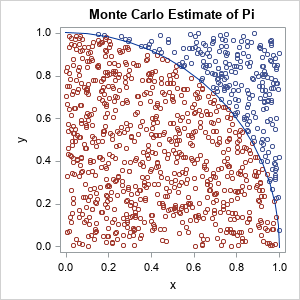

**Solution strategy**

* Consider you throwing darts in the picture above. Generate random pairs $(x, y)$, compute radius from the origin $(0,0)$ and check `if` your dart is inside the circle (red dot, `x*x + y*y <= 1.0`) or not (blue dots).
* Repeat N times and then compute $\pi=4\times$(*darts inside the circle*)/(*total number of throws N*)
* Take `N=100000` and use iteration loop `for i in range(N):` in Python code version and vector multiplication in Numpy code version. Use `%%timeit` magic command to compare computation time for those to routines.
* Improve accuracy of calculation for Numpy version by using additional loop to average over random number generator

**Home work instructions**

0) Download `Homework_L4.ipynb` to your working directory, open it in Jupyter-lab
1) Following instructions below type in your solution in the cells below instead of `# YOUR CODE HERE`
2) In the last Markdown cell make a brief explanation of the codes you made and insights you obtained
3) Save the notebook, restart the kernel and run all cells (use `>>` menu button) and then upload it to Canvas
4) *Deadline: before the next lecture*